Banach-Tarski Embeddings
========================

In [11]:
from embedding.structure import Struct
from embedding.schema import Schema
from embedding.encoder import Encoder

from util.graph import draw_struct
from matplotlib.pyplot import figure, plot, subplot

Our recursive data structures are defined schema, which specifies the possible labels and attributes of the structure. For example, we can define a toy schema for a pet:

In [12]:
sc = Schema(labels=['pet', 'cat', 'dog', 'bark', 'meow', 
                    'loud', 'soft', 'brown', 'grey'], 
            attributes=['type', 'sound', 'volume', 'color'])

We construct some example structures:

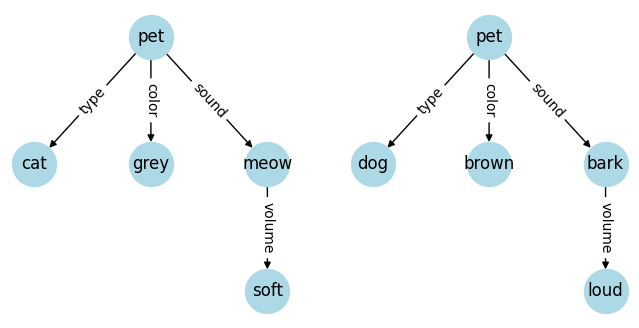

In [13]:
create = lambda x: Struct.create(sc, x)

cat = create(('pet', {'type': 'cat', 
                                 'color': 'grey',
                                 'sound': ('meow', 
                                           {'volume': 'soft'})}))
dog = create(('pet', {'type': 'dog', 
                                 'color': 'brown',
                                 'sound': ('bark', 
                                           {'volume': 'loud'})}))

figure(figsize=(8, 4))
subplot(1, 2, 1)
draw_struct(cat)
subplot(1, 2, 2)
draw_struct(dog)

We can now encode these structures into vectors:

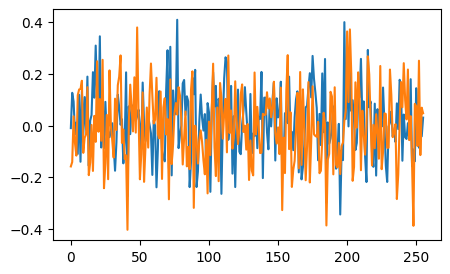

In [14]:
enc = Encoder(sc, dim=256)

v1 = enc.encode(cat)
v2 = enc.encode(dog)

figure(figsize=(5,3))
plot(v1)
plot(v2);

And decode them back into structures:

In [15]:
print(enc.decode(v1, to_strings=True))
print(enc.decode(v2, to_strings=True))

("pet", { "type": "cat", "sound": ("meow", { "volume": "soft",} ), "color": "grey",} )
("pet", { "type": "dog", "sound": ("bark", { "volume": "loud",} ), "color": "brown",} )
